# The Third Dark Energy School

# The Class
- What are the objectives:
    - you should be able to use ipython notebooks to develop your analyses
    - you should understand how to integrate scikit-learn, astroML, ... into you python tool kit
    - you should be able to fit models and quantify their robustness to errors and uncertainty
    
    
- Goto http://cadence.lsst.org/DESC_school/ 
  - ipython notebook RobustFitting.ipynb


- To start a remote notebook server click on the link in the <a href="https://confluence.slac.stanford.edu/display/LSSTDESC/SLAC+2016+-+DE+School">Dark Energy School</a> confluence page. **Warning** if you close the notebook you lose you work

<!-- TEASER_END -->

## Robust Model Fitting (aka regression)

Often we think about regression from the frequentist perspective of maximum-likelihood (or least squares). Why?

<center><img width=50%,  src="http://cs.wellesley.edu/~cs199/lectures/line-fit-errors.png"></center>


We have a model $f(\theta)$ and a data set and we want to learn the parameters of that model


# From a Bayes perspective

We get a more physical intuition for the information contained within a point (and its limits of uncertainties).

Bayes Theorem (lets assume you know it)


> $P(\theta|D, I) = \frac{P(D | \theta, I) P(\theta | I)}{P(D | I)}$

$P(\theta, I)$ : Prior (initial belief)

$P(D | \theta, I)$ : Likelihood (probability initial belief generated the data)

$P(D|I)$ : Probability of the data

$P(\theta|D, I)$ : Posterior (improved belief)
- k+1 dimensional space (k is number of parameters in your model)

### What if we only have one point?

Assume we have a data set ${\bf x}$ and ${\bf y}$ and a model, $f(\theta)$ that estimates the value of $\bf 
\hat{y}$

If we assume that the likelihood for a single data point is given by

> $p(\hat{y_i}|x_i,{\theta}, I) = e(\hat{y_i}|y)$

with $e(\hat{y_i}|y)$ the probability of getting $\hat{y_i}$ given the true value of $y$ (i.e. the error distribution). If the error distribution is Gaussian then,

> $p(\hat{y_i}|x_i,{\theta}, I) =  {1 \over \sigma_i \sqrt{2\pi}} \, \exp{\left({-[y_i
-f(x_i|{\theta})]^2 \over 2 \sigma_i^2}\right)}$

We can calculate a posterior with one point

As we add points we multiply the likelihood surfaces together to improve the constraints''

Or we can calculate the log likelihood

> $\ln \mathcal(L) \equiv \ln(({\theta}|x_i, y_i,I))  \propto \sum_{i=1}^N \left(\frac{-(y_i- (\theta_0 + \theta_1x_{i}))^2}{  2\sigma_i^2}\right)$
     
This is the log posterior (assuming the prior on the parameters is uniform)

Maximizing this is the same as minimizing the least squares 

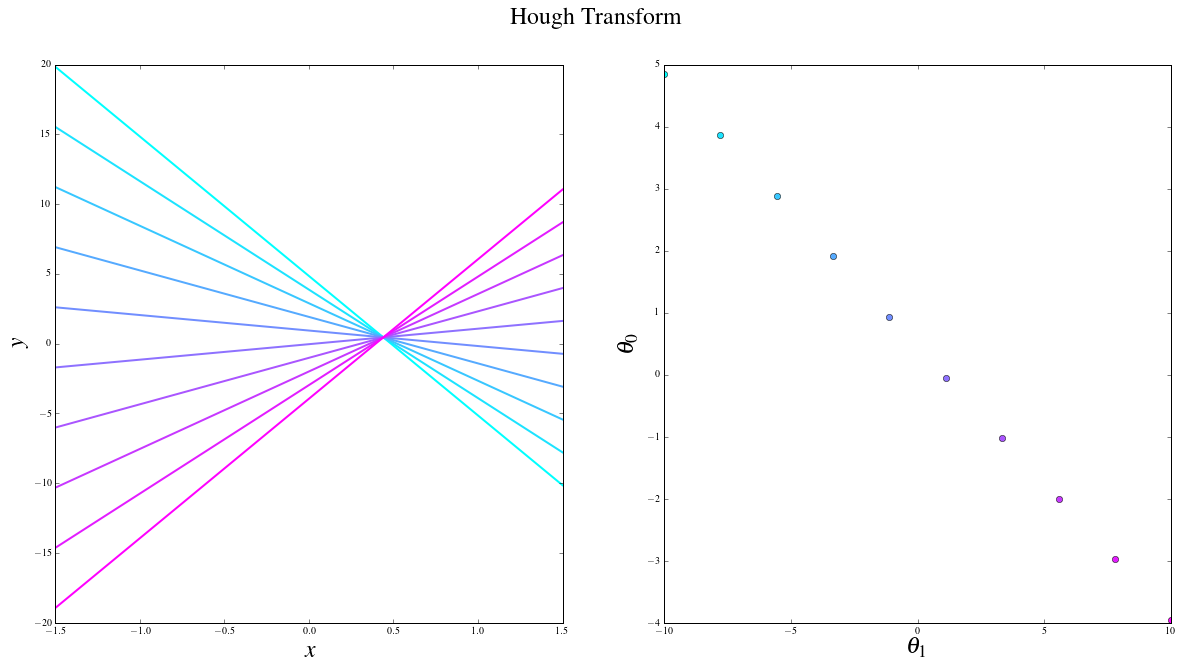

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#------------------------------------------------------------
# Set up a point assuming y = a*x + b
a = 1
b = 0

x = np.array([0.44])
y = a * x + b
xmin, xmax, ymin, ymax = [-1.5, 1.5, -1.5, 1.5]

#------------------------------------------------------------
# Compute the lines consistent with the point
nlines = 10
a_range = np.linspace(-10, 10, nlines)
b_val = y - a_range * x

#------------------------------------------------------------
# Plot the point and lines
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color_idx = np.linspace(0, 1, nlines)
for a_, b_, i in zip(a_range, b_val, color_idx):
    ax1.plot([xmin, xmax], [a_*xmin + b_, a_*xmax + b_], color=plt.cm.cool(i), linestyle='-', linewidth=2)
    points = ax2.plot(a_, b_, 'o', color=plt.cm.cool(i))

ax1.set_xlabel('$x$', fontsize=24)
ax1.set_ylabel('$y$', fontsize=24)   
ax2.set_xlabel('$\\theta_1$', fontsize=24)
ax2.set_ylabel('$\\theta_0$', fontsize=24)
fig.suptitle('Hough Transform', fontsize=24)
plt.show()

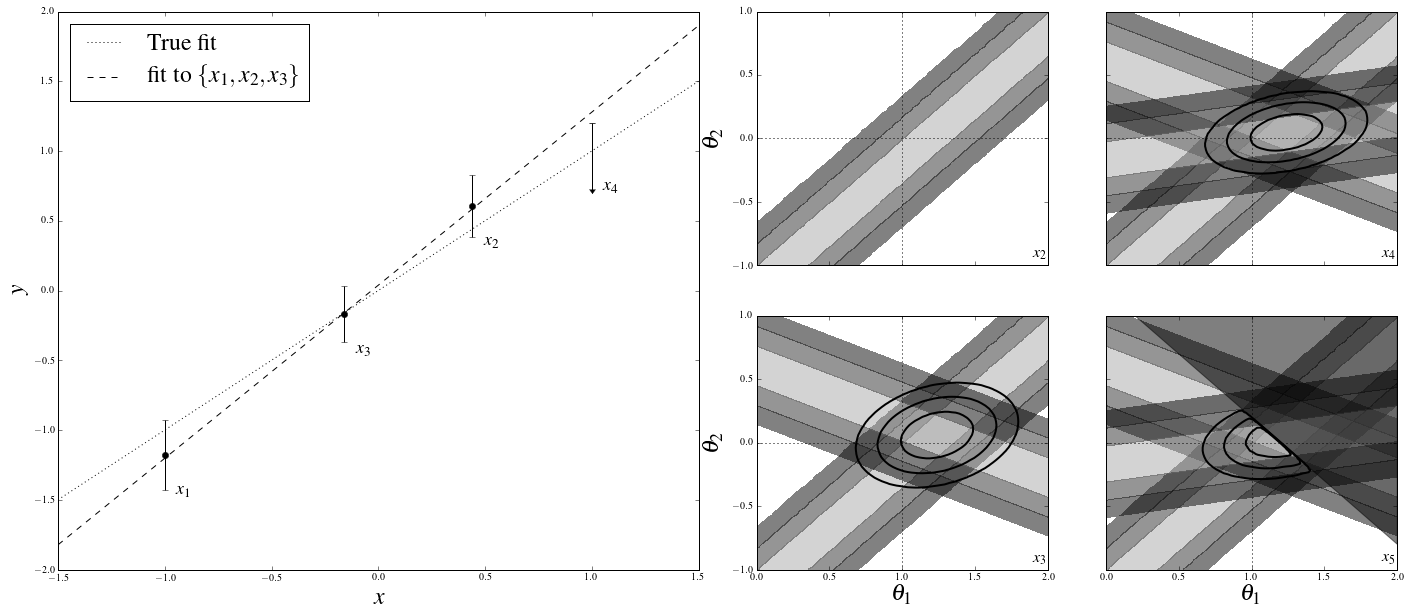

In [27]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#------------------------------------------------------------
# Set up the data and errors
np.random.seed(13)
a = 1
b = 0

x = np.array([-1, 0.44, -0.16])
y = a * x + b
dy = np.array([0.25, 0.22, 0.2])

y = np.random.normal(y, dy)

# add a fourth point which is a lower bound
x4 = 1.0
y4 = a * x4 + b + 0.2

#------------------------------------------------------------
# Compute the likelihoods for each point
a_range = np.linspace(0, 2, 80)
b_range = np.linspace(-1, 1, 80)
logL = -((a_range[:, None, None] * x + b_range[None, :, None] - y) / dy) ** 2
sigma = [convert_to_stdev(logL[:, :, i]) for i in range(3)]

# compute best-fit from first three points
logL_together = logL.sum(-1)
i, j = np.where(logL_together == np.max(logL_together))
amax = a_range[i[0]]
bmax = b_range[j[0]]

#------------------------------------------------------------
# Plot figures: the points and errorbars
fig = plt.figure(figsize=(24,10))
ax1 = plt.subplot2grid((2,4),(0, 0), colspan=2, rowspan=2)

# Draw the true and best-fit lines
xfit = np.array([-1.5, 1.5])
ax1.plot(xfit, a * xfit + b, ':k', label='True fit')
ax1.plot(xfit, amax * xfit + bmax, '--k', label='fit to $\{x_1, x_2, x_3\}$')

ax1.legend(loc=2, fontsize=24)

ax1.errorbar(x, y, dy, fmt='ok')
#ax1.errorbar([x4], [y4], [[0.5], [0]], fmt='_k', lolims=True)
ax1.errorbar([x4], [y4], [[0.5], [0]], fmt='_k', uplims=True)

for i in range(3):
    ax1.text(x[i] + 0.05, y[i] - 0.3, "$x_{%i}$" % (i + 1), fontsize=18)
ax1.text(x4 + 0.05, y4 - 0.5, "$x_4$", fontsize=18)

ax1.set_xlabel('$x$', fontsize=24)
ax1.set_ylabel('$y$', fontsize=24)

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-2, 2)

#------------------------------------------------------------
# Plot figures: likelihoods for each point

# plot likelihood contours
for i in range(4):
    ax = plt.subplot2grid((2,4),(i%2, 2+i/2))
    for j in range(min(i + 1, 3)):
        ax.contourf(a_range, b_range, sigma[j].T,
                    levels=(0, 0.683, 0.955, 0.997),
                    cmap=plt.cm.binary, alpha=0.5)

# plot the excluded area from the fourth point
axpb = a_range[:, None] * x4 + b_range[None, :]
mask = y4 < axpb
fig.axes[4].fill_between(a_range, y4 - x4 * a_range, 2, color='k', alpha=0.5)

# plot ellipses
for i in range(1, 4):
    ax = fig.axes[i+1]
    logL_together = logL[:, :, :i + 1].sum(-1)
    if i == 3:
        logL_together[mask] = -np.inf

    sigma_together = convert_to_stdev(logL_together)

    ax.contour(a_range, b_range, sigma_together.T,
               levels=(0.683, 0.955, 0.997),
               colors='k', linewidths=2)

# Label and adjust axes
for i in range(1, 5):
    ax = fig.axes[i]

    ax.text(1.98, -0.98, "$x_{%i}$" % (i + 1), ha='right', va='bottom',
            fontsize=16)

    ax.plot([0, 2], [0, 0], ':k', lw=1)
    ax.plot([1, 1], [-1, 1], ':k', lw=1)

    ax.set_xlim(0.001, 2)
    ax.set_ylim(-0.999, 1)

    if i in (3, 4):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i in (1, 3):
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i in (1, 2):
        ax.set_ylabel(r'$\theta_2$', fontsize=24)
    if i in (2, 4):
        ax.set_xlabel(r'$\theta_1$', fontsize=24)
plt.show()

# QUESTION: Why not go Bayesian all the time?

# Frequentist approaches arent all bad!

## A matrix formalism provides a simplified approach to regression techniques


In general the simplest approach for regression is to think of it in terms of vectors and matrices

> $Y= M \theta$

$Y$ is an $N$-dimensional vector of values ${y_i}$,
>$Y=\left[
\begin{array}{c}
y_0\\
.\\
y_{N-1}
\end{array}
\right].
$

For linear regression assuming (y = $\theta_0$ + $\theta_1$ x) $\theta$ is simply a two-dimensional
vector of regression coefficients,

>$
\theta=\left[
\begin{array}{c}
\theta_0\\
\theta_1
\end{array}
\right],
$

 $M$ is a called the design matrix
>$
M=\left[
\begin{array}{cc}
1 & x_0\\
.&.\\
1&x_{N-1}
\end{array}
\right]
$

the constant in the first column of $M$ captures the zeropoint in the regression 

For heteroscedastic undertainties we can define a covariance matrix

>$C=\left[
\begin{array}{cccc}
\sigma_{0}^2 & 0 & . & 0 \\
. & . & . & . \\
0 & 0 & . & \sigma_{N-1}^2 \\
\end{array}
\right]
$

and the maximum likelihood solution for the regression is

> $\theta = (M^T C^{-1} M)^{-1} (M^T C^{-1} Y)$

which minimizes the sum of squares and gives uncertainties on $\theta$ 

> $\Sigma_\theta =
\left[
\begin{array}{cc}
\sigma_{\theta_0}^2 & \sigma_{\theta_0\theta_1} \\
\sigma_{\theta_0\theta_1} & \sigma_{\theta_1}^2
\end{array}
\right]
= [M^T C^{-1} M]^{-1}.
$


With numpy it is straightforward to develop matrices and, as long as they can be inverted, calculate the  regression coefficients

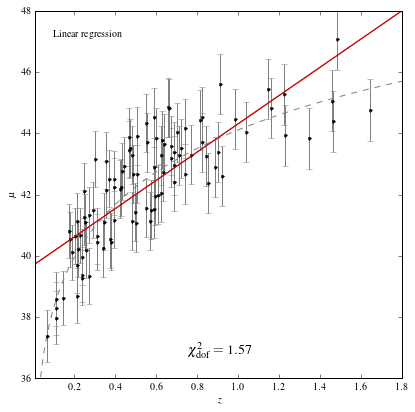

In [28]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 1000)
mu_true = np.asarray(map(cosmo.mu, z))

n_constraints = 2

#--------------------------------------------------------------
#fit data using the design matrix formalism (linear then quadratic)
C = np.identity(len(z_sample))*(dmu*dmu)

M = np.column_stack((np.ones(len(z_sample)),z_sample))
#M = np.column_stack((np.ones(len(z_sample)),z_sample, z_sample**2)) # quadratic

A = np.dot(np.dot(M.transpose(),np.linalg.pinv(C)),M)
B = np.dot(np.dot(M.transpose(),np.linalg.pinv(C)),mu_sample)

theta = np.dot(np.linalg.pinv(A),B)
mu_out = theta[0] + theta[1]*z 
#mu_out = theta[0] + theta[1]*z + theta[2]*z*z # quadratic


#fit data using standard package
clf = LinearRegression()
clf.fit(z_sample[:, None], mu_sample, dmu)
mu_sample_fit = clf.predict(z_sample[:, None])
mu_fit = clf.predict(z[:, None])
chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
                    / (len(mu_sample) - n_constraints))


#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)
ax = fig.add_subplot(111)

#plot the data
ax.plot(z, mu_fit, '-k')
ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.text(0.5, 0.05, r"$\chi^2_{\rm dof} = %.2f$" % chi2_dof,
    ha='center', va='bottom', transform=ax.transAxes, fontsize=14)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)
ax.text(0.05, 0.95, 'Linear regression', ha='left', va='top',
                transform=ax.transAxes)

ax.set_ylabel(r'$\mu$')

ax.set_xlabel(r'$z$')

#plot the fit
ax.plot(z, mu_out, '-k', color='red')

plt.show()

## Multivariate regression

Here we fit a hyperplane rather than a straight line

> $y_i =\theta_0 + \theta_1x_{i1} + \theta_2x_{i2} +
 \cdots +\theta_kx_{ik} + \epsilon_i$
 
 The design matrix, $M$, is now
 
> $M = \left(
\begin{array}{ccccccc}
1 & x_{01} & x_{02} & . & x_{0k}\\
1 & x_{11} & x_{12} & . & x_{1k}\\
. & . & . & .  & . \\
1 & x_{N1} & x_{N2} & . & x_{Nk}\\
\end{array}
\right)$

but the whole formalism is the same as before

## Basis function regression

If we consider a function in terms of the sum of bases (this can be polynomials, Gaussians, quadratics, cubics) then we can solve for the coefficients using regression. For polynomials,

> $M = \left(
\begin{array}{cccc}
1 & x_{0} & x_{0}^2 & x_{0}^3 \\
1 & x_{1} & x_{1}^2 & x_{1}^3\\
. & . & . & .  \\
1 & x_{N} & x_{N}^2 &  x_{N}^3\\
\end{array}
\right)$

but we could substitute $x_{0}^2$ etc for Gaussians (where we fix $\sigma$ and $\mu$ and fit for the amplitude) as long as the attribute we are fitting for is linear

## EXERCISE: 

- ## Modify the program below to create a design matrix that will fit Gaussians to the SN data
- ## Estimate the number of Gaussians that should be fit to the data

*it should require 2-3 lines

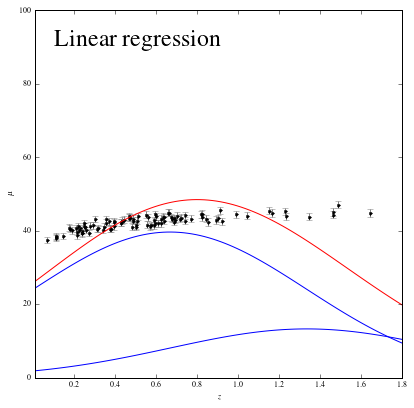

In [42]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 100)
mu_true = np.asarray(map(cosmo.mu, z))

#------------------------------------------------------------
# Define our Gaussians
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) 

# Fit Gaussians to the model (you choose the number of Gaussians)
nGaussians = 2
basis_mu = np.linspace(0., 2., nGaussians+2)[1:-1]
basis_sigma = 1. * (basis_mu[1] - basis_mu[0])
n_constraints = 2

####------------------------------------------------------------
# Create the design matrix 

####------------------------------------------------------------


#------------------------------------------------------------
#Invert the design matrix

M = np.matrix(M).T
C = np.matrix(np.diagflat(dmu**2))
Y = np.matrix(mu_sample).T
coeff = (M.T * C.I * M).I * (M.T * C.I * Y)

# Plot the results
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)
ax = fig.add_subplot(111)

# draw the fit to the data
i=0
mu_fit = np.zeros(len(z))
for i in range(nGaussians):
    mu_fit += coeff[i,0]*gaussian_basis(z, basis_mu[i], basis_sigma)


ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)


ax.set_xlim(0.01, 1.8)
ax.set_ylim(0.,100.)
ax.text(0.05, 0.95, 'Linear regression', ha='left', va='top',
                transform=ax.transAxes, fontsize=24)

#plot the gaussians
for i in range(nGaussians):
    if (coeff[i,0] > 0.):
        ax.plot(z,coeff[i,0]*gaussian_basis(z, basis_mu[i], basis_sigma),color='blue')
    else:
        ax.plot(z,-coeff[i,0]*gaussian_basis(z, basis_mu[i], basis_sigma),color='blue',ls='--')

ax.plot(z, mu_fit, '-k',color='red')

ax.set_ylabel(r'$\mu$')

ax.set_xlabel(r'$z$')


plt.show()

## How do you choose the number of variables to fit?


## Cross-validation

As the complexity of a model increases the data points fit the model more and more closely. 

This does not result in a better fit to the data. We are overfitting the data (the model has high variance - a small change in a training point can change the model dramatically). This is a classic bias variance trade-off

We can evaluate this using a training set (50-70% of sample),  a cross-validation set (15-25%) and a test set (15-25%)

The cross-validation set evaluates the cross-validation error $\epsilon_{\rm cv}$ of the model (large for overfit models). 

Test set gives an estimate of the reliability of the model.

We can define a cross validation error
>$\epsilon_{\rm cv}^{(n)} = \sqrt{\frac{1}{n}\sum_{i=1}^{N_{\rm cv}}
  \left[y_i - \sum_{m=0}^d \theta_0^{(n)}x_i^m\right]}$

where we train on the first $n$ points ($\le N_{\rm train}$) and evaluate the error on the $N_{\rm cv}$ cross validation points.

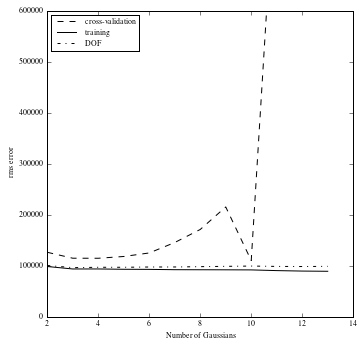

In [33]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression, PolynomialRegression,\
    BasisFunctionRegression, NadarayaWatson
from astroML.utils import split_samples

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 1000)
mu_true = np.asarray(map(cosmo.mu, z))
(z_train, z_test), (mu_train, mu_test) = split_samples(z_sample, 
                                                       np.column_stack((mu_sample,dmu*0.00001)), 
                                                       [0.75, 0.25], random_state=0)

# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)
ax = fig.add_subplot(111)

nEvaluation = 1
nGaussians = np.arange(2, 14, nEvaluation)
training_err = np.zeros(nGaussians.shape)
crossval_err = np.zeros(nGaussians.shape)
BIC_err = np.zeros(nGaussians.shape)
DOF_err = np.zeros(nGaussians.shape)

for i,j in enumerate(nGaussians):
    # fit the data
    basis_mu = np.linspace(0, 2, j)[:, None]
    basis_sigma = 3 * (basis_mu[1] - basis_mu[0])
    clf = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    n_constraints = len(basis_mu) + 1

    clf.fit(z_train[:, None], mu_train[:,0], mu_train[:,1])

    mu_train_fit = clf.predict(z_train[:, None])
    training_err[i] = np.sqrt(np.sum(((mu_train_fit - mu_train[:,0]) / mu_train[:,1]) ** 2) / len(mu_train[:,0]))
    DOF_err[i] = np.sqrt(np.sum(((mu_train_fit - mu_train[:,0]) / mu_train[:,1]) ** 2) / (len(mu_train[:,0]) - n_constraints))

    mu_test_fit = clf.predict(z_test[:, None])
    crossval_err[i] = np.sqrt(np.sum(((mu_test_fit - mu_test[:,0]) / mu_test[:,1]) ** 2) / len(mu_test[:,0]))
    
#print len(z_train), training_err, mu_train[:,1],  nGaussians
#BIC_train = np.sqrt(len(z_train)) * training_err / mu_train[:,1] + nGaussians * np.log(len(z_train))

ax.plot(nGaussians, crossval_err, '--k', label='cross-validation')
ax.plot(nGaussians, training_err, '-k', label='training')
ax.plot(nGaussians, DOF_err, '-.k', label='DOF')

ax.plot(nGaussians, 0.1 * np.ones(nGaussians.shape), ':k')

#ax.set_xlim(0, 14)
ax.set_ylim(0, 600000)

ax.set_xlabel('Number of Gaussians')
ax.set_ylabel('rms error')
ax.legend(loc=2)

     
plt.show()

## Many forms for cross validation

_Twofold cross-validation_ 
- Split the data into a training set $d_1$, a cross-validation set $d_2$, and a test set $d_0$.  
- Robust for smaller data sets.

_$K$-fold cross-validation_
 - Splits the data into $K + 1$ sets: the test set $d_0$, and the cross-validation sets  $d_1, d_2, \ldots, d_K$.  

_Leave-one-out cross-validation_
 - Same as $K$-fold cross-validation, but this  time our sets $d_1, d_2, \ldots, d_K$ have only one data point each.    
 - Useful when the size of the data set is very small


## Regularization

If we progressively increase the number of terms in the fit we reach a regime where we are overfitting the data (i.e. there are not enough degrees of freedom)

For cases where we are concerned with overfitting we can apply constraints (usually of smoothness, number of coefficients, size of coefficients).

> ($Y - M \theta)^T(Y- M \theta) + \lambda |\theta^T \theta|$

with $\lambda$ the regularization parameter

This leads to a solution for the parameters of the model

> $\theta = (M^T C^{-1} M + \lambda I)^{-1} (M^T C^{-1} Y)$

with $I$ the identity model

From the Bayesian perspective this is the same as applying a prior to the regression coefficients

> $p(\theta | I ) \propto \exp{\left(\frac{-(\lambda \theta^T \theta)}{2}\right)}$

which, when multiplied by the likelihood for regression, gives the same posterior as described above

## Ridge (Tikhonov) regularization

> $ |\theta |^2 < s$

penalty is on the sum of the squares of the regression coefficients

<center><img width=50%,  src="https://dl.dropboxusercontent.com/u/4772501/figures/ridge.png"></center>

This penalizes the square of the size of the coefficients - ridge regression is a fast optimization  because it is strictly convex

Number of coefficient 100 100
Number of coefficient 100 100


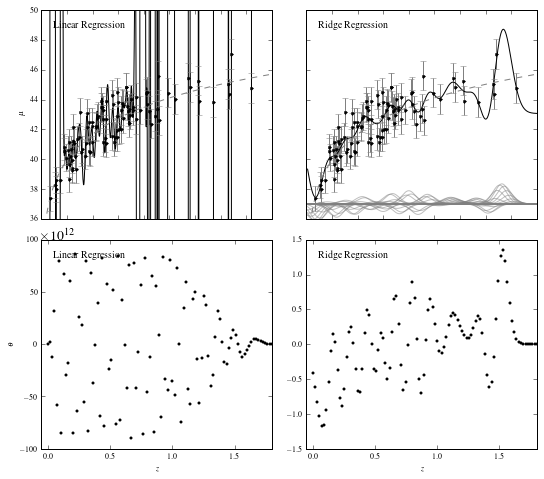

In [34]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

import matplotlib

#----------------------------------------------------------------------
# generate data
np.random.seed(0)

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)
cosmo = Cosmology()

z = np.linspace(0.01, 2, 1000)
mu = np.asarray(map(cosmo.mu, z))


#------------------------------------------------------------
# Manually convert data to a gaussian basis
#  note that we're ignoring errors here, for the sake of example.
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

nGaussians=100
centers = np.linspace(0, 1.8, nGaussians)
widths = 3 * (centers[1] - centers[0])
X = gaussian_basis(z_sample[:, np.newaxis], centers, widths)

#------------------------------------------------------------
# Set up the figure to plot the results
fig = plt.figure(figsize=(12, 7))
fig.subplots_adjust(left=0.07, right=0.95,
                    bottom=0.08, top=0.95,
                    hspace=0.1, wspace=0.15)

lamVal=0.09
classifier = [LinearRegression, Ridge]
kwargs = [dict(), dict(alpha=lamVal), ]
labels = ['Linear Regression', 'Ridge Regression', ]

for i in range(2):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, mu_sample)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(z[:, None], centers, widths))

    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        curves = 37 + w * gaussian_basis(z[:, np.newaxis], centers, widths)
        curves = curves[:, abs(w) > 0.01]
        ax.plot(z, curves,
                c='gray', lw=1, alpha=0.5)

    ax.plot(z, fit, '-k')
    ax.plot(z, mu, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    ax.set_xlim(0.001, 1.8)
    ax.set_ylim(36, 50)
    ax.text(0.05, 0.95, labels[i],
            ha='left', va='top',
            transform=ax.transAxes)

    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$z$')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes, fontsize=14)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(-0.05, 1.8)

    #ax.set_ylim(-2, 4)

    ax.text(0.05, 0.95, labels[i],
            ha='left', va='top',
            transform=ax.transAxes)
    print "Number of coefficient",len(clf.coef_),len(np.where(np.abs(clf.coef_) > 0.)[0])

plt.show()

## How do we choose $\lambda$ - cross validation  (the answer to everything)

## Least absolute shrinkage and selection (Lasso) regularization

>$(Y - M \theta)^T(Y- M \theta) + \lambda |\theta|$


>$ |\theta | < s$

penalty is on the absolute values of the regression coefficients

<center><img src="https://dl.dropboxusercontent.com/u/4772501/figures/lasso.png"></center>

# QUESTION: What is the result of Lasso? What will happen to the regression coefficients 

Lasso works well for dictionary type analyses when we are selecting a subset of models or basis functions to fit our model

Number of coefficient 100 100
Number of coefficient 100 12


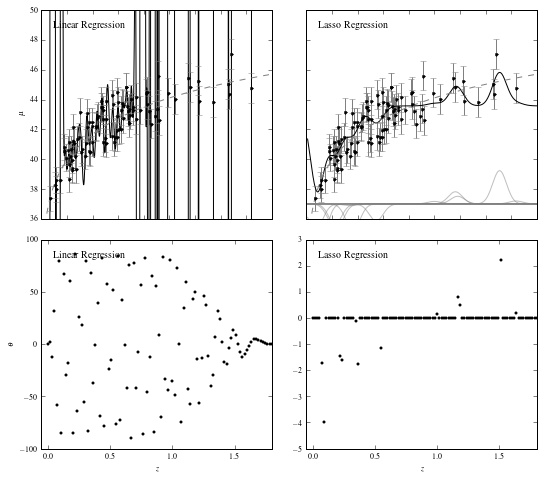

In [35]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm

from sklearn.linear_model import LinearRegression, Lasso

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

import matplotlib

#----------------------------------------------------------------------
# generate data
np.random.seed(0)

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)
cosmo = Cosmology()

z = np.linspace(0.01, 2, 1000)
mu = np.asarray(map(cosmo.mu, z))


#------------------------------------------------------------
# Manually convert data to a gaussian basis
#  note that we're ignoring errors here, for the sake of example.
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

#nGaussians=10
nGaussians=100
centers = np.linspace(0, 1.8, nGaussians)
widths = 3 * (centers[1] - centers[0])
X = gaussian_basis(z_sample[:, np.newaxis], centers, widths)

#------------------------------------------------------------
# Set up the figure to plot the results
fig = plt.figure(figsize=(12, 7))
fig.subplots_adjust(left=0.07, right=0.95,
                    bottom=0.08, top=0.95,
                    hspace=0.1, wspace=0.15)

#alphaVal=0.000000000000000001
alphaVal=0.009
classifier = [LinearRegression, Lasso]
kwargs = [dict(), dict(alpha=alphaVal), ]
labels = ['Linear Regression', 'Lasso Regression', ]

for i in range(2):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, mu_sample)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(z[:, None], centers, widths))

    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        curves = 37 + w * gaussian_basis(z[:, np.newaxis], centers, widths)
        curves = curves[:, abs(w) > 0.01]
        ax.plot(z, curves,
                c='gray', lw=1, alpha=0.5)

    ax.plot(z, fit, '-k')
    ax.plot(z, mu, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    ax.set_xlim(0.001, 1.8)
    ax.set_ylim(36, 50)
    ax.text(0.05, 0.95, labels[i],
            ha='left', va='top',
            transform=ax.transAxes)

    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$z$')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
#        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
#                transform=ax.transAxes, fontsize=14)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(-0.05, 1.8)

    #ax.set_ylim(-2, 4)

    ax.text(0.05, 0.95, labels[i],
            ha='left', va='top',
            transform=ax.transAxes)
    print "Number of coefficient",len(clf.coef_),\
        len(np.where(np.abs(clf.coef_) > 0.)[0])

plt.show()

# How do we deal with outliers: robust regression

The $L_2$ norm is sensitive to outliers (i.e. it squares the residuals). A number of approaches exist for correcting for outliers. These include "sigma-clipping", using interquartile ranges, taking the median of solutions of subsets of the data, and least trimmed squares (which searchs for the subset of points that minimizes $\sum_i^K (y_i - \theta_ix_i)^2$).



Other approaches include changing the error function that is minimized such as the _Huber loss function_

> $
\sum_{i=1}^N e(y_i|y),
$

where

>$
e(t) = \left\{
\begin{array}{ll}
\frac{1}{2} t^2 & \mbox{if} \; |t| \leq c, \\
c|t| - \frac{1}{2} c^2 & \mbox{if} \; |t| \geq c,
\end{array}
\right )
$

this is continuous and differentiable and transitions to an $L_1$ norm for large excursions



still uses gradient descent for optimizer


Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 43.439758
         Iterations: 59
         Function evaluations: 115
[   1.07674745  213.27350923]
[  1.96473118  70.00573832]


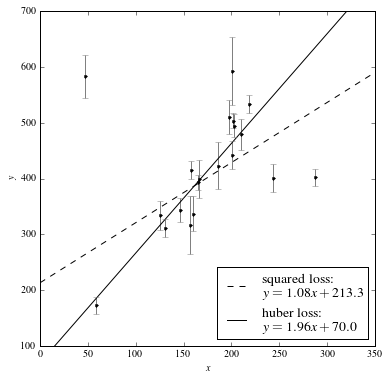

In [23]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from scipy import optimize
from astroML.datasets import fetch_hogg2010test

#------------------------------------------------------------
# Get data: this includes outliers
data = fetch_hogg2010test()
x = data['x']
y = data['y']
dy = data['sigma_y']


# Define the standard squared-loss function
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)


# Define the log-likelihood via the Huber loss function
def huber_loss(m, b, x, y, dy, c=2):
    y_fit = m * x + b
    t = abs((y - y_fit) / dy)
    flag = t > c
    return np.sum((~flag) * (0.5 * t ** 2) - (flag) * c * (0.5 * c - t), -1)

f_squared = lambda beta: squared_loss(beta[0], beta[1], x=x, y=y, dy=dy)
f_huber = lambda beta: huber_loss(beta[0], beta[1], x=x, y=y, dy=dy, c=1)

#------------------------------------------------------------
# compute the maximum likelihood using the huber loss
beta0 = (2, 30)
beta_squared = optimize.fmin(f_squared, beta0)
beta_huber = optimize.fmin(f_huber, beta0)

print beta_squared
print beta_huber

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

x_fit = np.linspace(0, 350, 10)
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], '--k',
        label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
ax.plot(x_fit, beta_huber[0] * x_fit + beta_huber[1], '-k',
        label="huber loss:\n $y=%.2fx + %.1f$" % tuple(beta_huber))
ax.legend(loc=4, prop=dict(size=14))

ax.errorbar(x, y, dy, fmt='.k', lw=1, ecolor='gray')

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

## A Bayesian approach to outliers


Explain marginalize


Lets assume the data are drawn from two populations


Gaussians error distribution (one for the function and the other for the outliers)

> $\begin{eqnarray}
&  p(\{y_i\}|\{x_i\}, \{\sigma_i\}, \theta_0, \theta_1, \mu_b, V_b, p_b)
  \propto \nonumber\\
&  \prod_{i=1}^{N} \bigg[
    \frac{1-p_b}{\sqrt{2\pi\sigma_i^2}}
      \exp\left(-\frac{(y_i - \theta_1 x_i - \theta_0)^2}
               {2 \sigma_i^2}\right)
    + \frac{p_b}{\sqrt{2\pi(V_b + \sigma_i^2)}}
    \exp\left(-\frac{(y_i - \mu_b)^2}{2(V_b + \sigma_i^2)}\right)
    \bigg].
\end{eqnarray}
$

$V_b$ is the variance of the outlier distribution. If we use MCMC we can marginalize over the nuisance  parameters $p_b$, $V_b$, $\mu_b$. 

/bold We could also calculate the probability that a point is drawn from the outlier or "model" Gaussian.





 [-----------------100%-----------------] 25000 of 25000 complete in 7.4 sec

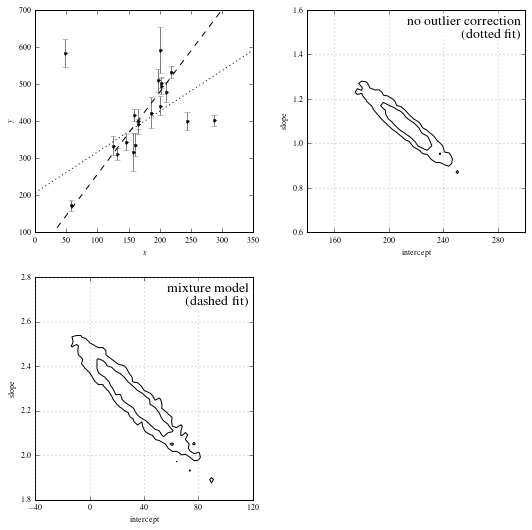

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_hogg2010test
from astroML.plotting.mcmc import convert_to_stdev

import pymc

np.random.seed(0)
pymc.numpy.random.seed(0)

#------------------------------------------------------------
# Get data: this includes outliers
data = fetch_hogg2010test()
xi = data['x']
yi = data['y']
dyi = data['sigma_y']


#----------------------------------------------------------------------
# First model: no outlier correction
# define priors on beta = (slope, intercept)
@pymc.stochastic
def beta_M0(value=np.array([2., 100.])):
    """Slope and intercept parameters for a straight line.
    The likelihood corresponds to the prior probability of the parameters."""
    slope, intercept = value
    prob_intercept = 1 + 0 * intercept
    # uniform prior on theta = arctan(slope)
    # d[arctan(x)]/dx = 1 / (1 + x^2)
    prob_slope = np.log(1. / (1. + slope ** 2))
    return prob_intercept + prob_slope


@pymc.deterministic
def model_M0(xi=xi, beta=beta_M0):
    slope, intercept = beta
    return slope * xi + intercept

y = pymc.Normal('y', mu=model_M0, tau=dyi ** -2,
                observed=True, value=yi)

M0 = dict(beta_M0=beta_M0, model_M0=model_M0, y=y)


#----------------------------------------------------------------------
# Second model: nuisance variables correcting for outliers
# This is the mixture model given in equation 17 in Hogg et al

# define priors on beta = (slope, intercept)
@pymc.stochastic
def beta_M1(value=np.array([2., 100.])):
    """Slope and intercept parameters for a straight line.
    The likelihood corresponds to the prior probability of the parameters."""
    slope, intercept = value
    prob_intercept = 1 + 0 * intercept
    # uniform prior on theta = arctan(slope)
    # d[arctan(x)]/dx = 1 / (1 + x^2)
    prob_slope = np.log(1. / (1. + slope ** 2))
    return prob_intercept + prob_slope


@pymc.deterministic
def model_M1(xi=xi, beta=beta_M1):
    slope, intercept = beta
    return slope * xi + intercept

# uniform prior on Pb, the fraction of bad points
Pb = pymc.Uniform('Pb', 0, 1.0, value=0.1)

# uniform prior on Yb, the centroid of the outlier distribution
Yb = pymc.Uniform('Yb', -10000, 10000, value=0)

# uniform prior on log(sigmab), the spread of the outlier distribution
log_sigmab = pymc.Uniform('log_sigmab', -10, 10, value=5)


@pymc.deterministic
def sigmab(log_sigmab=log_sigmab):
    return np.exp(log_sigmab)


# set up the expression for likelihood
def mixture_likelihood(yi, model, dyi, Pb, Yb, sigmab):
    """Equation 17 of Hogg 2010"""
    Vi = dyi ** 2
    Vb = sigmab ** 2

    root2pi = np.sqrt(2 * np.pi)

    L_in = (1. / root2pi / dyi
            * np.exp(-0.5 * (yi - model) ** 2 / Vi))

    L_out = (1. / root2pi / np.sqrt(Vi + Vb)
             * np.exp(-0.5 * (yi - Yb) ** 2 / (Vi + Vb)))

    return np.sum(np.log((1 - Pb) * L_in + Pb * L_out))

MixtureNormal = pymc.stochastic_from_dist('mixturenormal',
                                          logp=mixture_likelihood,
                                          dtype=np.float,
                                          mv=True)

y_mixture = MixtureNormal('y_mixture', model=model_M1, dyi=dyi,
                          Pb=Pb, Yb=Yb, sigmab=sigmab,
                          observed=True, value=yi)

M1 = dict(y_mixture=y_mixture, beta_M1=beta_M1, model_M1=model_M1,
          Pb=Pb, Yb=Yb, log_sigmab=log_sigmab, sigmab=sigmab)


#------------------------------------------------------------
# plot the data
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.1, top=0.95, hspace=0.2)

# first axes: plot the data
ax1 = fig.add_subplot(221)
ax1.errorbar(xi, yi, dyi, fmt='.k', ecolor='gray', lw=1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

#------------------------------------------------------------
# Go through models; compute and plot likelihoods
models = [M0, M1]
linestyles = [':', '--', '-']
labels = ['no outlier correction\n(dotted fit)',
          'mixture model\n(dashed fit)',
          ]


x = np.linspace(0, 350, 10)

bins = [(np.linspace(140, 300, 51), np.linspace(0.6, 1.6, 51)),
        (np.linspace(-40, 120, 51), np.linspace(1.8, 2.8, 51)),
        (np.linspace(-40, 120, 51), np.linspace(1.8, 2.8, 51))]

for i, M in enumerate(models):
    S = pymc.MCMC(M)
    S.sample(iter=25000, burn=5000)
    trace = S.trace('beta_M%i' % i)

    H2D, bins1, bins2 = np.histogram2d(trace[:, 0], trace[:, 1], bins=50)
    w = np.where(H2D == H2D.max())

    # choose the maximum posterior slope and intercept
    slope_best = bins1[w[0][0]]
    intercept_best = bins2[w[1][0]]

    # plot the best-fit line
    ax1.plot(x, intercept_best + slope_best * x, linestyles[i], c='k')

    # For the model which identifies bad points,
    # plot circles around points identified as outliers.
    if i == 2:
        qi = S.trace('qi')[:]
        Pi = qi.astype(float).mean(0)
        outlier_x = xi[Pi < 0.32]
        outlier_y = yi[Pi < 0.32]
        ax1.scatter(outlier_x, outlier_y, lw=1, s=400, alpha=0.5,
                    facecolors='none', edgecolors='red')

    # plot the likelihood contours
    ax = plt.subplot(222 + i)

    H, xbins, ybins = np.histogram2d(trace[:, 1], trace[:, 0], bins=bins[i])
    H[H == 0] = 1E-16
    Nsigma = convert_to_stdev(np.log(H))

    ax.contour(0.5 * (xbins[1:] + xbins[:-1]),
               0.5 * (ybins[1:] + ybins[:-1]),
               Nsigma.T, levels=[0.683, 0.955], colors='black')

    ax.set_xlabel('intercept')
    ax.set_ylabel('slope')
    ax.grid(color='gray')
    ax.xaxis.set_major_locator(plt.MultipleLocator(40))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))

    ax.text(0.98, 0.98, labels[i], ha='right', va='top', fontsize=14,
            bbox=dict(fc='w', ec='none', alpha=0.5),
            transform=ax.transAxes)
    ax.set_xlim(bins[i][0][0], bins[i][0][-1])
    ax.set_ylim(bins[i][1][0], bins[i][1][-1])

ax1.set_xlim(0, 350)
ax1.set_ylim(100, 700)

plt.show()

## The full monty: uncertainties all round

What about real-world applications, where the independent variable (usually) is not free
from any uncertainty. Imagine the "true" relation,

>$
y^*_i=\theta_0 + \theta_1x^*_{i}.
$

Now we make measurements in $x$, and $y$ which are noisy (Gaussian noise)

>$
x_i = x^*_i + \delta_i,\\
y_i = y^* + \epsilon_i,
$

Solving for $y$ we get
>$
      \hat{y}_i=  \theta_0 + \theta_1 (x_i - \delta_i) +\epsilon_i.
$

$\hat{y}$ depends on the noise in $x$

How can we account for the measurement uncertainties in both the
independent and dependent variables? Assuming they are Gaussian


> $ \Sigma_i = \left[
\begin{array}{cc}
\sigma_{x_i}^2 & \sigma_{xy_i} \\
\sigma_{xy_i} & \sigma_{y_i}^2
\end{array}
\right]
$

If we go back to the start of the lecture and write the equation for a line in terms of its normal vector 

> $ {\bf n} = \left [
\begin{array}{c}
-\sin \alpha\\
\cos \alpha\\
\end{array}
\right ] $

with $\theta_1 = \arctan(\alpha)$ and $\alpha$ is the angle
between the line and the $x$-axis. 

The covariance matrix projects onto
this space as
>$ S_i^2 = {\bf n}^T \Sigma_i {\bf n} $

and the  distance between a point and the line is

>$\Delta_i = {\bf n}^T
  z_i - \theta_0\ \cos \alpha, $
  
where $z_i$ represents the data point
>$(x_i,y_i)$.

The log-likelihood is then
>$ {\rm lnL} = - \sum_i \frac{\Delta_i^2}{2 S_i^2}$

and we can maximize the liklihood as a brute-force search or through MCMC

<b> IT WOULD BE A REALLY INTERESTING PROBLEM TO EXTEND AND GENERALIZE THIS - IT WOULD GET A LOT OF CITATIONS!</b>

Optimization terminated successfully.
         Current function value: 7725.143767
         Iterations: 76
         Function evaluations: 143


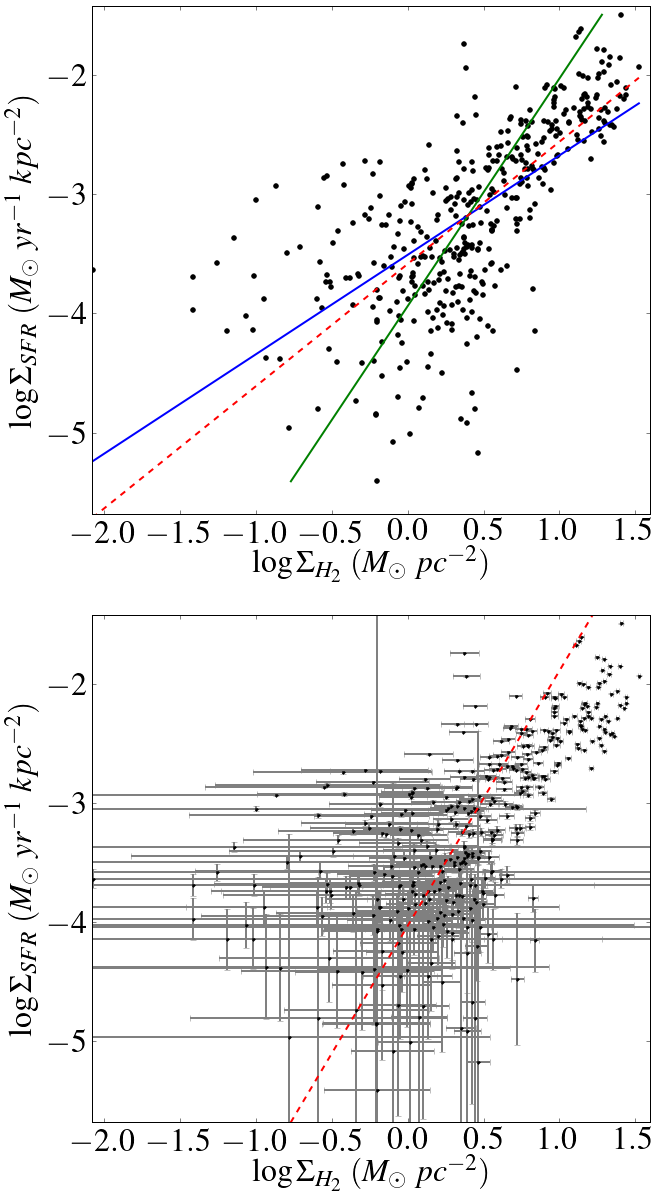

In [38]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression as LR
from astroML.plotting import setup_text_plots

from astroML.linear_model import TLS_logL
#from astroML.plotting.mcmc import convert_to_stdev

def convert_to_stdev(logL):
    """
    Given a grid of log-likelihood values, convert them to cumulative
    standard deviation.  This is useful for drawing contours from a
    grid of likelihoods.
    """
    sigma = np.exp(logL)
    shape = sigma.shape
    sigma = sigma.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(sigma)[::-1]
    i_unsort = np.argsort(i_sort)

    sigma_cumsum = sigma[i_sort].cumsum()
    sigma_cumsum /= sigma_cumsum[-1]

    return sigma_cumsum[i_unsort].reshape(shape)


# translate between typical slope-intercept representation, and the normal vector representation
def get_m_b(beta):
    b = np.dot(beta, beta) / beta[1]
    m = -beta[0] / beta[1]
    return m, b


def get_beta(m, b):
    denom = (1 + m * m)
    return np.array([-b * m / denom, b / denom])


# compute the ellipse pricipal axes and rotation from covariance
def get_principal(sigma_x, sigma_y, rho_xy):
    sigma_xy2 = rho_xy * sigma_x * sigma_y

    alpha = 0.5 * np.arctan2(2 * sigma_xy2,
                             (sigma_x ** 2 - sigma_y ** 2))
    tmp1 = 0.5 * (sigma_x ** 2 + sigma_y ** 2)
    tmp2 = np.sqrt(0.25 * (sigma_x ** 2 - sigma_y ** 2) ** 2 + sigma_xy2 ** 2)

    return np.sqrt(tmp1 + tmp2), np.sqrt(tmp1 - tmp2), alpha


# plot ellipses
def plot_ellipses(x, y, sigma_x, sigma_y, rho_xy, factor=2, ax=None):
    if ax is None:
        ax = plt.gca()

    sigma1, sigma2, alpha = get_principal(sigma_x, sigma_y, rho_xy)

    for i in range(len(x)):
        ax.add_patch(Ellipse((x[i], y[i]),
                             factor * sigma1[i], factor * sigma2[i],
                             alpha[i] * 180. / np.pi,
                             fc='none', ec='k'))


def main ():
    # read data and select training and cross validation sample
    x,dx,y,dy = np.loadtxt("X_Y.clean.txt", skiprows=1, unpack=True)
    dxy=np.zeros(len(x))

    # define classifiers
    n_constraints = [2,]

    # set plots
    fig = plt.figure(figsize=(10, 20))
    ax = fig.add_subplot(211)
    ax.scatter(x, y,c='black')
    xSample = np.linspace(x.min(), x.max(), 1000)

    # generate fits: y given x with no errors scikit-learn
    clf = LR(fit_intercept=True)
    clf.fit(x[:, None], y)
    yFit = clf.predict(x[:, None])
    ySample = clf.predict(xSample[:, None])

    chi2_dof = (np.sum(((yFit - y)) ** 2)
                / (len(yFit) - n_constraints[0]))

    ax.plot(xSample, ySample, '-k',color='b', lw=2)
    b11, b12 = clf.intercept_, clf.coef_       

    # generate fits: x given y with no errors scikit-learn
    ySample = np.linspace(y.min(), y.max(), 1000)
    clf.fit(y[:, None], x)
    xFit = clf.predict(y[:, None])
    xSample = clf.predict(ySample[:, None])
    chi2_dof = (np.sum(((xFit - x) / dx) ** 2)
                / (len(xFit) - n_constraints[0]))
    ax.plot(xSample, ySample, '-k',color='g',lw=2)
    b21, b22 = -clf.intercept_/clf.coef_, 1./clf.coef_


    ax.set_xlim(x.min()/1.05,x.max()*1.05)
    ax.set_ylim(y.min()*1.05,y.max()/1.05)
    ax.set_xlabel("$\log \Sigma_{H_2}\ (M_\odot\ pc^{-2})$")
    ax.set_ylabel("$\log \Sigma_{SFR}\ (M_\odot\ yr^{-1}\ kpc^{-2})$")


    #geometric mean
    b32 = (b12 + b22)**-1 * (b12*b22 - 1. + np.sqrt((1+b12**2)*(1+b22)))
    b31 = y.mean() - x.mean()*b32 
    xSample = np.linspace(x.min(), x.max(), 1000)
    ySample = b32*xSample + b31
    ax.plot(xSample, ySample, '--k',color='r', lw=2)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(32)
  

    ax = fig.add_subplot(212)
    #Hogg approach
    #------------------------------------------------------------
    # Find best-fit parameters
    X = np.vstack((x, y)).T
    dX = np.zeros((len(x), 2, 2))

    dX[:, 0, 0] = dx ** 2
    dX[:, 1, 1] = dy ** 2
    dX[:, 0, 1] = dX[:, 1, 0] = dxy * dx * dy

    min_func = lambda beta: -TLS_logL(beta, X, dX)
    beta_fit = optimize.fmin(min_func,
                             x0=[1., 0])

    ax.errorbar(x, y, dy, dx, fmt='.k', ecolor='gray', lw=2)
    ax.set_xlim(x.min()/1.05,x.max()*1.05)
    ax.set_ylim(y.min()*1.05,y.max()/1.05)
    ax.set_xlabel("$\log \Sigma_{H_2}\ (M_\odot\ pc^{-2})$")
    ax.set_ylabel("$\log \Sigma_{SFR}\ (M_\odot\ yr^{-1}\ kpc^{-2})$")

    m_fit, b_fit = get_m_b(beta_fit)
    x_fit = np.linspace(x.min(), x.max(), 10)
    b = y.mean() - x.mean()*m_fit

    ax.plot(x_fit, m_fit * x_fit + b, '--k',color='r', lw=2)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(32)
  


    plt.show()

if __name__ == '__main__':
    main()


# Summary

- ### ipython (or jupyter) notebooks provide a simple means to develop your analysis and share it
- ### import scikit-learn, astroML, pymc, emcee ... should be in your everyday analysis (take a look at Dask, Pandas, Spark, and X-ray)
- ### robust approaches (regularization, outlier rejection, errors on variables) should all be part of you tool kit


- Andy should adopt a better programming style. Perhaps someone could show him how?

# Follow-up slides

## Kernel (Nadaraya-Watson) Regression

Given a kernel $K(x_i,x)$ (e.g. a Gaussian or top-hat) at each point we estimate the function value by

>$f(x|K) = \frac{\sum_{i=1}^N K\left( \frac{||x_i-x||}{h} \right) y_i}
{\sum_{i=1}^N K\left( \frac{||x_i-x||}{h} \right)}$

a weighted average of $y$ (weighted by distance) with

>$w_i(x) = \frac{ K\left( \frac{||x_i-x||}{h} \right)}
{\sum_{i=1}^N K\left( \frac{||x_i-x||}{h} \right)}$

Locally weighted regression drives the regressed value to the nearest neighbor (when we have few points) which helps with extrapolation issues

Defining the correct bandwidth of the kernel is also done through cross-validation

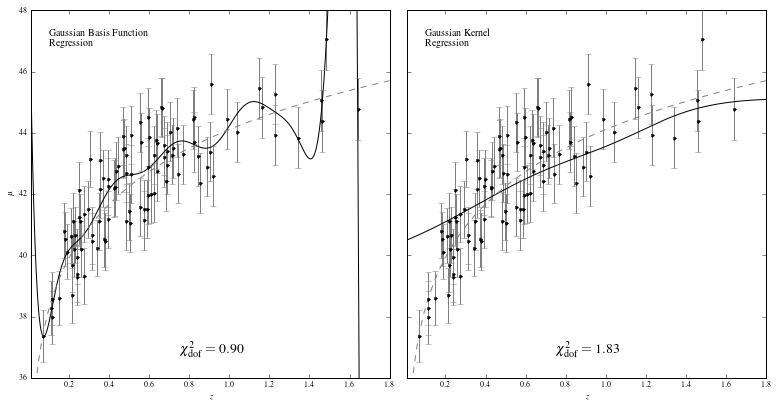

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression, PolynomialRegression,\
    BasisFunctionRegression, NadarayaWatson

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 1000)
mu_true = np.asarray(map(cosmo.mu, z))

#------------------------------------------------------------
# Define our classifiers
basis_mu = np.linspace(0, 2, 15)[:, None]
basis_sigma = 3 * (basis_mu[1] - basis_mu[0])

subplots = [121, 122, ]
classifiers = [BasisFunctionRegression('gaussian',
                                       mu=basis_mu, sigma=basis_sigma),
               NadarayaWatson('gaussian', h=0.25)]
text = ['Gaussian Basis Function\n Regression',
        'Gaussian Kernel\n Regression']

# number of constraints of the model.  Because
# Nadaraya-watson is just a weighted mean, it has only one constraint
n_constraints = [2, 5, len(basis_mu) + 1, 1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)

for i in range(2):
    ax = fig.add_subplot(subplots[i])

    # fit the data
    clf = classifiers[i]
    clf.fit(z_sample[:, None], mu_sample, dmu)

    mu_sample_fit = clf.predict(z_sample[:, None])
    mu_fit = clf.predict(z[:, None])

    chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
                / (len(mu_sample) - n_constraints[i]))

    ax.plot(z, mu_fit, '-k')
    ax.plot(z, mu_true, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

    ax.text(0.5, 0.05, r"$\chi^2_{\rm dof} = %.2f$" % chi2_dof,
            ha='center', va='bottom', transform=ax.transAxes, fontsize=14)

    ax.set_xlim(0.01, 1.8)
    ax.set_ylim(36.01, 48)
    ax.text(0.05, 0.95, text[i], ha='left', va='top',
            transform=ax.transAxes)

    if (i == 0):
        ax.set_ylabel(r'$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlabel(r'$z$')

plt.show()

## Locally Linear Regression (LOWESS or LOESS)

Similar to Kernel regression but we fit the local regression to the weighted points

> $\sum_{i=1}^N  K\left(\frac{||x-x_i||}{h}\right) \left( y_i - w(x) \, x_i \right)^2.$

LOWESS often uses the Kernel

> $K(x_i,x) = \left ( 1 - \left ( \frac{|x - x_i |}h{}\right )^3 \right )^3$

## Non-Linear Regression

The linear-regression techniques assume that the regression coefficients scale linearly. In many cases this is not true. 

Initial approaches to non-linear functions typically resort to transforming the data (e.g. logs and magnitudes). 

MCMC techniques can be used to sample the parameter space.

An alternate approach is to use the Levenberg-Marquardt (LM) algorithm to optimize the maximum likelihood estimation. LM searches through a combination of gradient descent and Gauss-Newton optimization. If we can express our
regression function as a Taylor series expansion then, to first order,
we can write

> $f(x_i|\theta) = f(x_i|\theta_0) + J d\theta$

where $\theta_0$ is an initial guess for the regression parameters,
$J$ is the Jacobian about this point ($J=\partial f(x_i|\theta)/ \partial
 \theta$), and $d\theta$ is a small change in the regression
parameters. 

How do we get this derivation (in words)


LM minimizes the sum of square errors,

> $\sum_i (y_i- f(x_i|\theta_0) - J_i d\theta)^2$

for the perturbation $d\theta$. This results in an update relation for
$d\theta$ of

> $(J^TC^{-1}J + \lambda\ {\rm diag}(J^TC^{-1}J) )\,d\theta = J^TC^{-1}(Y-f(X|\theta))$

$\lambda$ term acts as a damping parameter.  For small $\lambda$ the relation approximates a Gauss-Newton method (i.e.,
it minimizes the parameters assuming the function is quadratic). For
large $\lambda$ the perturbation $d\theta$ follows the direction of
steepest descent. The diag$(J^TC^{-1}J)$ term, as opposed to the
identity matrix used in ridge regression, ensures that the update of
$d\theta$ is largest along directions where the gradient is smallest (which
improves convergence).


_In SciPy scipy.optimize.leastsq implements the LM algorithm_

## Gaussian Proccess Regression

The "bible" for GP is Rasmussen and Williams "Gaussian Processes for Machine Learning" (2005)

A GP is a collection of random variables in a parameter space for which any subset can be defined by a joint Gaussian distribution. We can define them simply by the covariance function, e.g.

> $  {\rm Cov}(x_1, x_2; h) = \exp\left(\frac{-(x_1 - x_2)^2}{2 h^2}\right)$

For a given bandwidth we can define an infinite set of functions. We constrain these functions by selecting those that pass though a given set of points (like our initial regression analysis)

> $p(f_j | \{x_i, y_i, \sigma_i\}, x_j^\ast)$

<img src="https://dl.dropboxusercontent.com/u/4772501/figures/gp.png">

For GP regression we want to estimate the value and variance of a new set of points given an input data set. This is equivalent to averaging over all functions that pass through our input data

The covariance matrix

> $  K = \begin{pmatrix}
    K_{11} & K_{12} \\
    K_{12}^T & K_{22}
  \end{pmatrix},
$

where $K_{11}$ is the covariance between the input points $x_i$ with
observational errors $\sigma_i^2$ added in quadrature to the diagonal,
$K_{12}$ is the cross-covariance between the input points $x_i$ and the unknown points
$x^\ast_j$, and $K_{22}$ is the covariance between the unknown points
$x_j^\ast$.  

Then for observed vectors $\vec{x}$ and $\vec{y}$, and a vector
of unknown points $\vec{x}^\ast$, it can be shown that the posterior is given by

>$  p(f_j | \{x_i, y_i, \sigma_i\}, x_j^\ast) = \mathcal{N}(\vec{\mu}, \Sigma)$

where

>$
\begin{eqnarray}
  \vec{\mu} &=& K_{12} K_{11}^{-1} \vec{y}, \\
  \Sigma &=& K_{22} - K_{12}^TK_{11}^{-1}K_{12}
\end{eqnarray}
$

$\mu_j$ gives the expected value $\bar{f}^\ast_j$ of the result, and
$\Sigma_{jk}$ gives the error covariance between any two unknown points.

_it gives the value and uncertainty of a predicted point_

Note that the physics of the underlying process enters through the assumed
form of the covariance function 

[[ 0.18093568]]


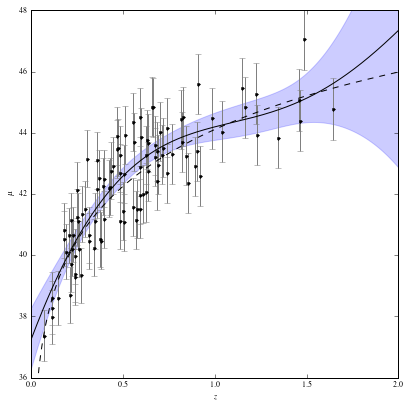

In [40]:
%matplotlib inline
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcess

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 1000)
mu_true = np.asarray(map(cosmo.mu, z))

#------------------------------------------------------------
# fit the data
# Mesh the input space for evaluations of the real function,
# the prediction and its MSE
z_fit = np.linspace(0, 2, 1000)
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-2, thetaU=1,
                     normalize=False,
                     nugget=(dmu / mu_sample) ** 2,
                     random_start=1)
gp.fit(z_sample[:, None], mu_sample)
y_pred, MSE = gp.predict(z_fit[:, None], eval_MSE=True)
sigma = np.sqrt(MSE)
print gp.theta_


#------------------------------------------------------------
# Plot the gaussian process
#  gaussian process allows computation of the error at each point
#  so we will show this as a shaded region
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.plot(z, mu_true, '--k')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', markersize=6)
ax.plot(z_fit, y_pred, '-k')
ax.fill_between(z_fit, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                alpha=0.2, color='b', label='95% confidence interval')

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.set_xlim(0, 2)
ax.set_ylim(36, 48)

plt.show()
